# Create, Draw and Fit a TGraph2DErrors

Create the 2D graph and the function to fit.

In [1]:
const double e = 0.3;
const int nd = 500;

TGraph2DErrors dte(nd);

TF2 f2("f2", "1000*(([0]*sin(x)/x)*([1]*sin(y)/y))+200", -6, 6, -6, 6);
f2.SetParameters(1, 1);

TRandom3 my_random_generator;

Fill the graph.

In [2]:
double rnd, x, y, z, ex, ey, ez;
for (Int_t i = 0; i < nd; i++) {
    f2.GetRandom2(x, y);
    
    // A random number in [-e,e]
    rnd = my_random_generator.Uniform(-e,e);
    
    z = f2.Eval(x, y) * (1 + rnd);
    dte.SetPoint(i, x, y, z);
    ex = 0.05 * my_random_generator.Uniform();
    ey = 0.05 * my_random_generator.Uniform();
    ez = fabs(z * rnd);
    dte.SetPointError(i, ex, ey, ez);
}

Warning in <TF2::GetRandom2>: function:f2 has 24 negative values: abs assumed


Fit the function to the generated data.

In [3]:
f2.SetParameters(0.7, 1.5);  // set initial values for fit
f2.SetTitle("Fitted 2D function");
dte.Fit(&f2);

 FCN=517.445 FROM MIGRAD    STATUS=CONVERGED      38 CALLS          39 TOTAL
                     EDM=2.65702e-12    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.81725e-01   4.37173e-01   2.40425e-05   8.08231e-04
   2  p1           1.46084e+00   9.36798e-01   5.15197e-05   3.78774e-04


Configure the canvas for plotting the result.

In [4]:
auto c1 = new TCanvas();
f2.SetLineWidth(1);
f2.SetLineColor(kBlue - 5);
TF2   *f2c = (TF2*)f2.DrawClone("Surf1");
TAxis *Xaxis = f2c->GetXaxis();
TAxis *Yaxis = f2c->GetYaxis();
TAxis *Zaxis = f2c->GetZaxis();
Xaxis->SetTitle("X Title"); Xaxis->SetTitleOffset(1.5);
Yaxis->SetTitle("Y Title"); Yaxis->SetTitleOffset(1.5);
Zaxis->SetTitle("Z Title"); Zaxis->SetTitleOffset(1.5);
dte.DrawClone("P0 Same");

Display the 2D graph in the notebook.

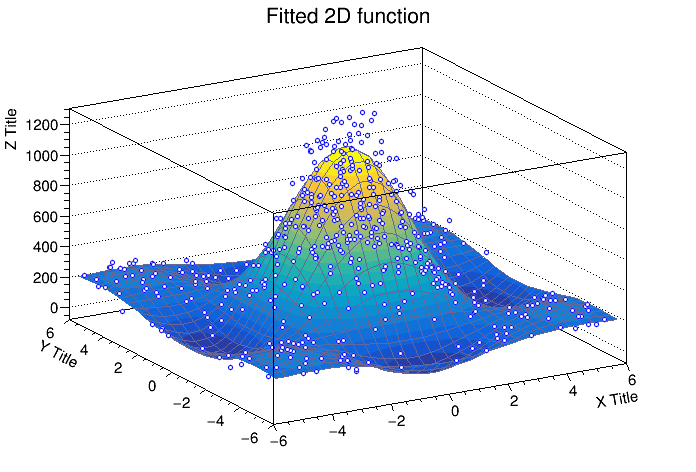

In [5]:
c1->Draw();

Make the x and y projections.

In [6]:
gStyle->SetPalette(kBird);
auto c_p = new TCanvas("ProjCan", "The Projections", 1000, 400);
c_p->Divide(2,1);
c_p->cd(1);
dte.Project("x")->Draw();
c_p->cd(2);
dte.Project("y")->Draw();

Activate the JavaScript visualisation mode and display the projections in the notebook.

In [7]:
%jsroot on
c_p->Draw();